<a href="https://colab.research.google.com/github/TAUforPython/BioMedAI/blob/main/classification_ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Классификатор - линейная регрессия (Ridge Regression)

Ridge Regression

Ridge Regression is a type of Linear Regression in which the regularization term is added as a parameter. This regularization term is also known as L2 regularization. This is done so as to avoid overfitting. Overfitting is when the model performs excellently on training data but poorly on the test or unseen data. Regularization introduces penalties on higher terms so as to reduce loss as well as overfitting in the model. The cost formula for the Ridge Regression is as follows

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. It has been used in many fields including econometrics, chemistry, and engineering. Also known as **Tikhonov regularization**.

The Ridge Classifier is a machine learning algorithm designed for multi-class classification tasks.

Задача классификации, а так же расмотрим один из способов борьбы с неравномерностью данных в классах

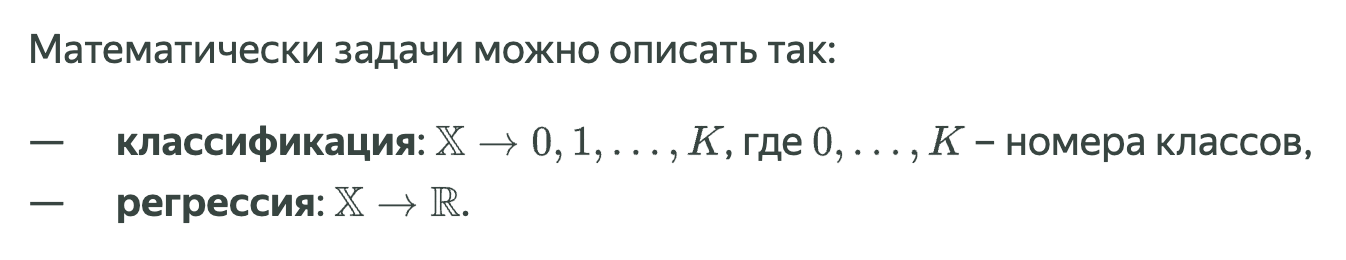

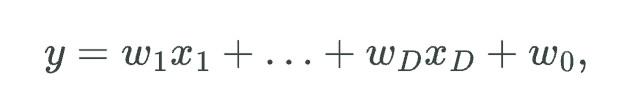

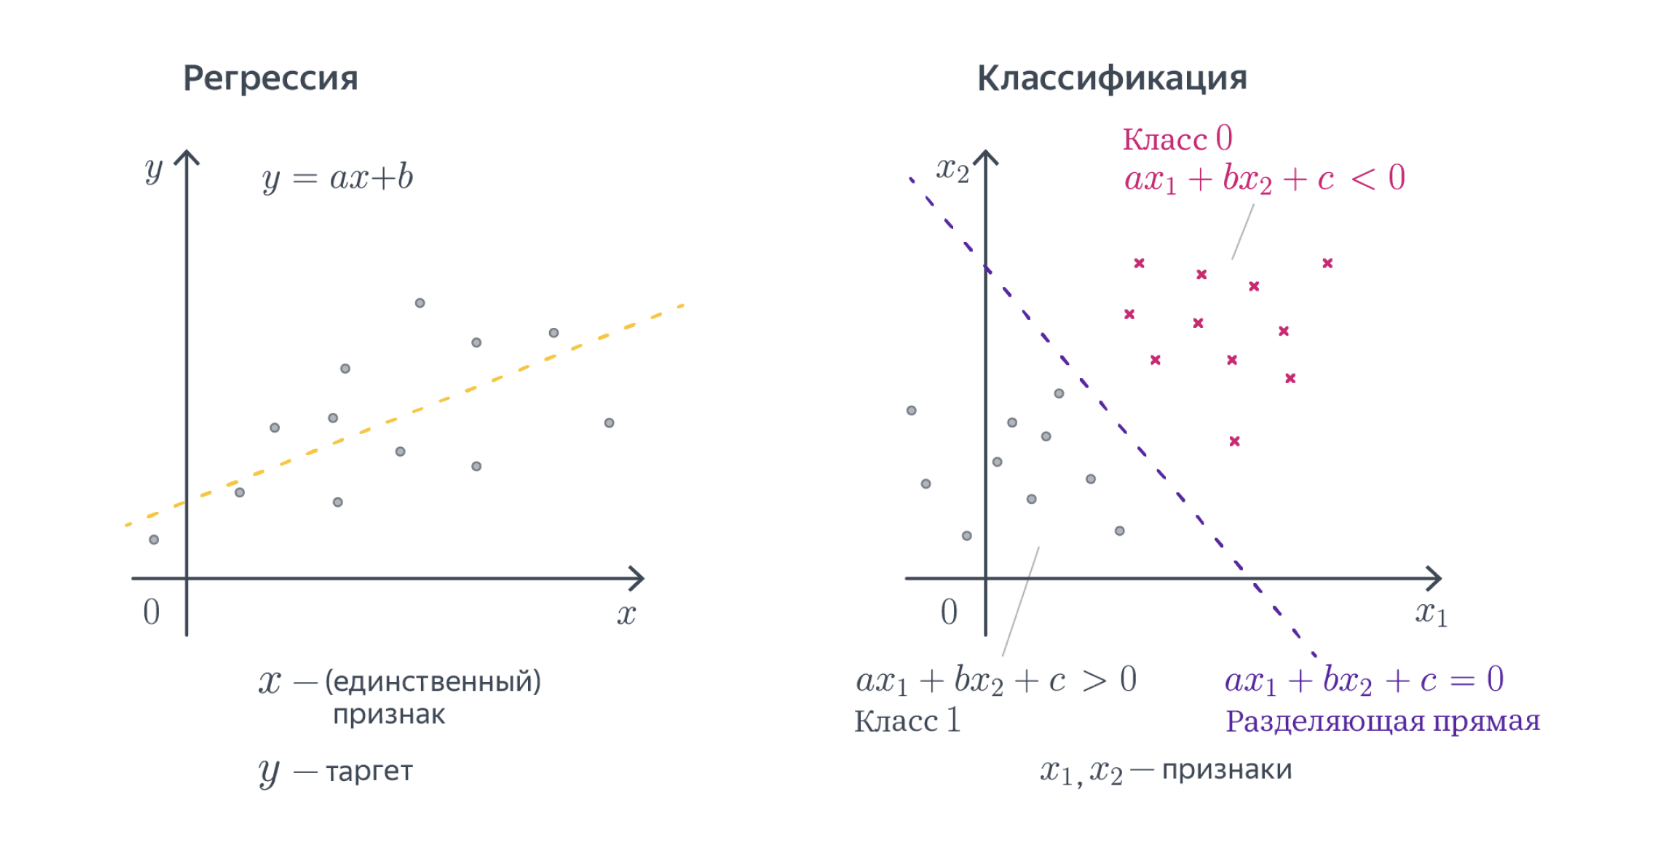

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [3]:
model = linear_model.RidgeClassifier()

In [7]:
#model.fit()

In [8]:
#model.predict()

## Пример задачи

In [14]:
df = pd.read_csv('oil_spill.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [15]:
df.head(2)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.0,1000.0,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.0,11500.0,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0


In [16]:
df.groupby('target')['f_1'].count()

,f_1
target,
0,896
1,41


In [17]:
Y = df['target']

In [18]:
X = df.drop('target', axis=1)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=Y)

In [20]:
model = linear_model.RidgeClassifier(random_state=42)
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.35131e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RidgeClassifier(random_state=42)

In [21]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[177   3]
 [  6   2]]


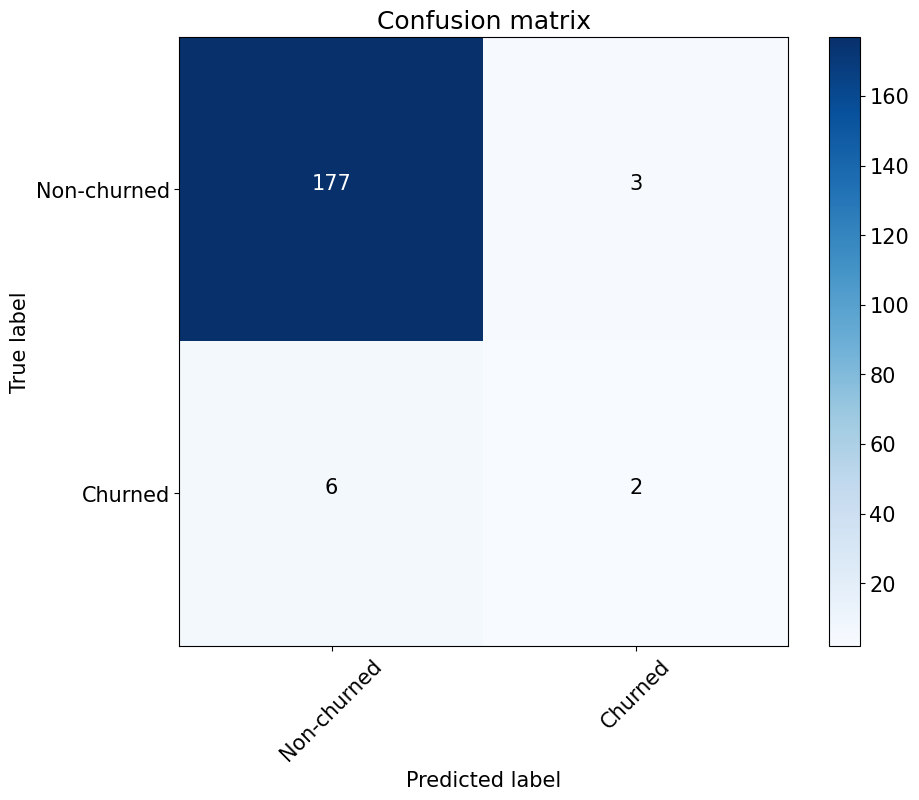

In [23]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [24]:
print(classification_report(Y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       716
           1       1.00      0.42      0.60        33

    accuracy                           0.97       749
   macro avg       0.99      0.71      0.79       749
weighted avg       0.98      0.97      0.97       749



In [25]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       180
           1       0.40      0.25      0.31         8

    accuracy                           0.95       188
   macro avg       0.68      0.62      0.64       188
weighted avg       0.94      0.95      0.95       188



In [26]:
from imblearn.under_sampling import RandomUnderSampler

# Создание экземпляра RandomUnderSampler
rus = RandomUnderSampler()

# Применение уменьшения выборки к данным
X_resampled, y_resampled = rus.fit_resample(X, Y)

In [27]:
y_resampled.sum(), len(y_resampled)

(41, 82)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled,
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=y_resampled)

In [29]:
model = linear_model.RidgeClassifier(random_state=42)
model.fit(X_train, Y_train)

RidgeClassifier(random_state=42)

Confusion matrix, without normalization
[[8 1]
 [3 5]]


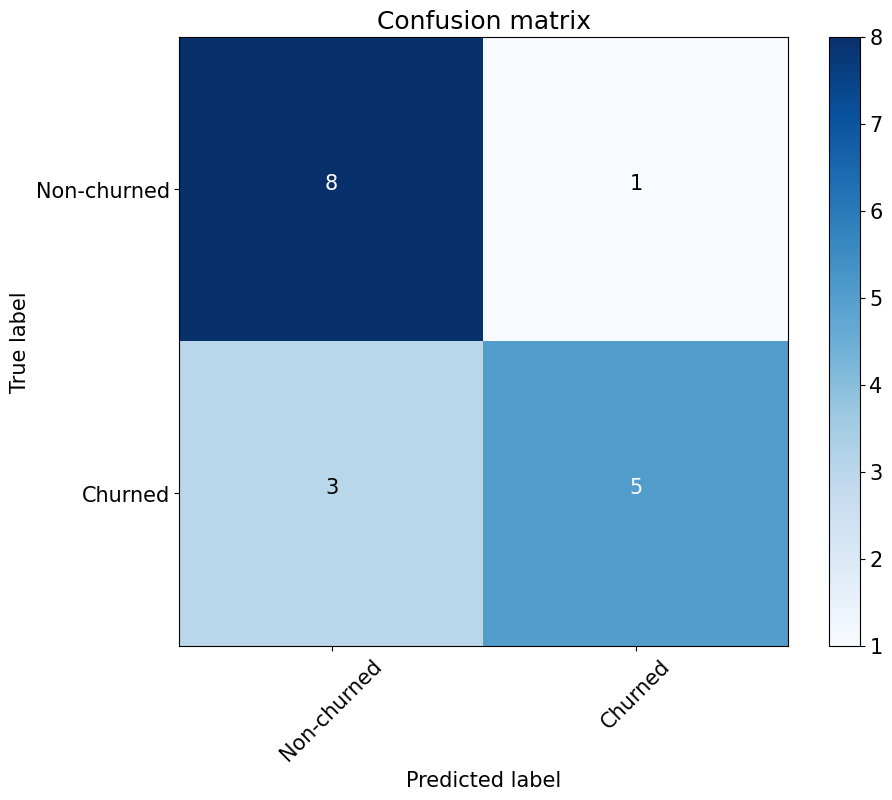

In [30]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [31]:
print(classification_report(Y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.98        33

    accuracy                           0.98        65
   macro avg       0.98      0.98      0.98        65
weighted avg       0.99      0.98      0.98        65



In [32]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.83      0.62      0.71         8

    accuracy                           0.76        17
   macro avg       0.78      0.76      0.76        17
weighted avg       0.78      0.76      0.76        17



In [33]:
param_grid = {
    'one_vs_all__loss': ['hinge', 'log', 'modified_huber',
                                    'squared_hinge', 'perceptron'],

    'one_vs_all__penalty': ['l1', 'l2', 'elasticnet'],

    'one_vs_all__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_one_vs_all = Pipeline([
    ("std_scaler", StandardScaler()),
     ("one_vs_all", SGDClassifier(random_state=42))])

pipe_one_vs_all.fit(X_train, Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('one_vs_all', SGDClassifier(random_state=42))])

In [36]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']

for i in loss:
    pipe_one_vs_all = Pipeline([("std_scaler", StandardScaler()),
                 ("one_vs_all", SGDClassifier(loss=i, random_state=42))])

    pipe_one_vs_all.fit(X_train, Y_train)
    print('-' * 5, i, '-' * 5)
    print(pipe_one_vs_all.classes_)
    print(classification_report(y_true = Y_test, y_pred = pipe_one_vs_all.predict(X_test),labels=[0, 1], digits=3))
    print('-' * 15)

----- hinge -----
[0 1]
              precision    recall  f1-score   support

           0      1.000     0.667     0.800         9
           1      0.727     1.000     0.842         8

    accuracy                          0.824        17
   macro avg      0.864     0.833     0.821        17
weighted avg      0.872     0.824     0.820        17

---------------


InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'hinge', 'epsilon_insensitive', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'squared_epsilon_insensitive', 'log_loss'}. Got 'log' instead.

In [37]:
search_one_all = GridSearchCV(pipe_one_vs_all, param_grid, scoring='accuracy')
search_one_all.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

GridSearchCV(estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('one_vs_all',
                                        SGDClassifier(loss='log',
                                                      random_state=42))]),
             param_grid={'one_vs_all__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10],
                         'one_vs_all__loss': ['hinge', 'log', 'modified_huber',
                                              'squared_hinge', 'perceptron'],
                         'one_vs_all__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [38]:
search_one_all.best_params_

{'one_vs_all__alpha': 0.001,
 'one_vs_all__loss': 'hinge',
 'one_vs_all__penalty': 'l2'}

In [39]:
print(classification_report(y_true = Y_train, y_pred = search_one_all.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.89      0.94      0.91        33

    accuracy                           0.91        65
   macro avg       0.91      0.91      0.91        65
weighted avg       0.91      0.91      0.91        65



In [40]:
print(classification_report(y_true = Y_test, y_pred = search_one_all.predict(X_test),labels=[0, 1], digits=3))

              precision    recall  f1-score   support

           0      0.833     0.556     0.667         9
           1      0.636     0.875     0.737         8

    accuracy                          0.706        17
   macro avg      0.735     0.715     0.702        17
weighted avg      0.741     0.706     0.700        17



# пример 2 Банк

In [41]:
df = pd.read_csv('bankloans.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [42]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [43]:
df = df[~(df['default'].isnull())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [44]:
df['default'] = df['default'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.7 KB


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=Y)

In [46]:
pipe_one_vs_all = Pipeline([
    ("std_scaler", StandardScaler()),
     ("one_vs_all", SGDClassifier(random_state=42))])

pipe_one_vs_all.fit(X_train, Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('one_vs_all', SGDClassifier(random_state=42))])

In [47]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']

for i in loss:
    pipe_one_vs_all = Pipeline([("std_scaler", StandardScaler()),
                 ("one_vs_all", SGDClassifier(loss=i, random_state=42))])

    pipe_one_vs_all.fit(X_train, Y_train)
    print('-' * 5, i, '-' * 5)
    print(pipe_one_vs_all.classes_)
    print(classification_report(y_true = Y_test, y_pred = pipe_one_vs_all.predict(X_test),labels=[0, 1], digits=3))
    print('-' * 15)

----- hinge -----
[0 1]
              precision    recall  f1-score   support

           0      0.978     0.972     0.975       180
           1      0.444     0.500     0.471         8

    accuracy                          0.952       188
   macro avg      0.711     0.736     0.723       188
weighted avg      0.955     0.952     0.953       188

---------------


InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'hinge', 'epsilon_insensitive', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'squared_epsilon_insensitive', 'log_loss'}. Got 'log' instead.

In [48]:
# Создание экземпляра RandomUnderSampler
rus = RandomUnderSampler()

# Применение уменьшения выборки к данным
X_resampled, y_resampled = rus.fit_resample(X, Y)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled,
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=y_resampled)

In [50]:
pipe_one_vs_all.fit(X_train, Y_train)

InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'hinge', 'epsilon_insensitive', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'squared_epsilon_insensitive', 'log_loss'}. Got 'log' instead.

In [51]:
for i in loss:
    pipe_one_vs_all = Pipeline([("std_scaler", StandardScaler()),
                 ("one_vs_all", SGDClassifier(loss=i, random_state=42))])

    pipe_one_vs_all.fit(X_train, Y_train)
    print('-' * 5, i, '-' * 5)
    print(pipe_one_vs_all.classes_)
    print(classification_report(y_true = Y_test, y_pred = pipe_one_vs_all.predict(X_test),labels=[0, 1], digits=3))
    print('-' * 15)

----- hinge -----
[0 1]
              precision    recall  f1-score   support

           0      0.778     0.778     0.778         9
           1      0.750     0.750     0.750         8

    accuracy                          0.765        17
   macro avg      0.764     0.764     0.764        17
weighted avg      0.765     0.765     0.765        17

---------------


InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'hinge', 'epsilon_insensitive', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'squared_epsilon_insensitive', 'log_loss'}. Got 'log' instead.

In [52]:
search_one_all = GridSearchCV(pipe_one_vs_all, param_grid, scoring='accuracy')
search_one_all.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

GridSearchCV(estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('one_vs_all',
                                        SGDClassifier(loss='log',
                                                      random_state=42))]),
             param_grid={'one_vs_all__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10],
                         'one_vs_all__loss': ['hinge', 'log', 'modified_huber',
                                              'squared_hinge', 'perceptron'],
                         'one_vs_all__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [53]:
search_one_all.best_params_

{'one_vs_all__alpha': 0.1,
 'one_vs_all__loss': 'perceptron',
 'one_vs_all__penalty': 'l2'}

In [54]:
print(classification_report(y_true = Y_train, y_pred = search_one_all.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        33

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [55]:
print(classification_report(y_true = Y_test, y_pred = search_one_all.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.75      0.75      0.75         8

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17

